In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import random

In [ ]:
import matplotlib.pyplot as plt

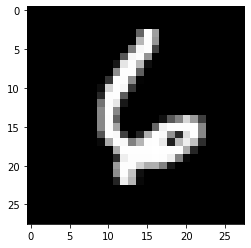

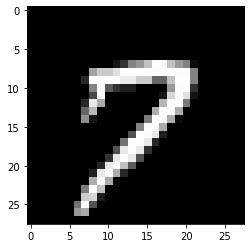

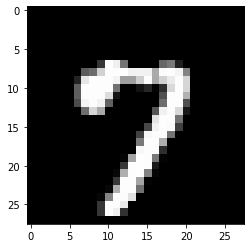

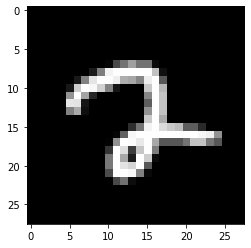

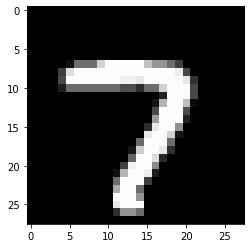

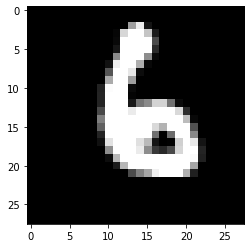

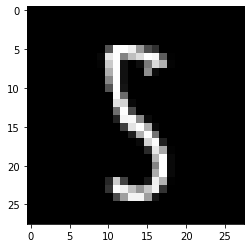

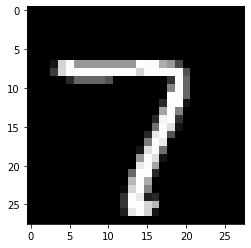

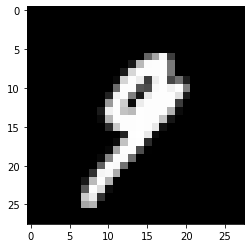

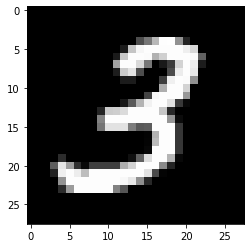

In [ ]:

for i in range(1,10):
  num=random.randint(1,1000)



  plt.imshow(x_train[num],cmap='gray')
  plt.show()

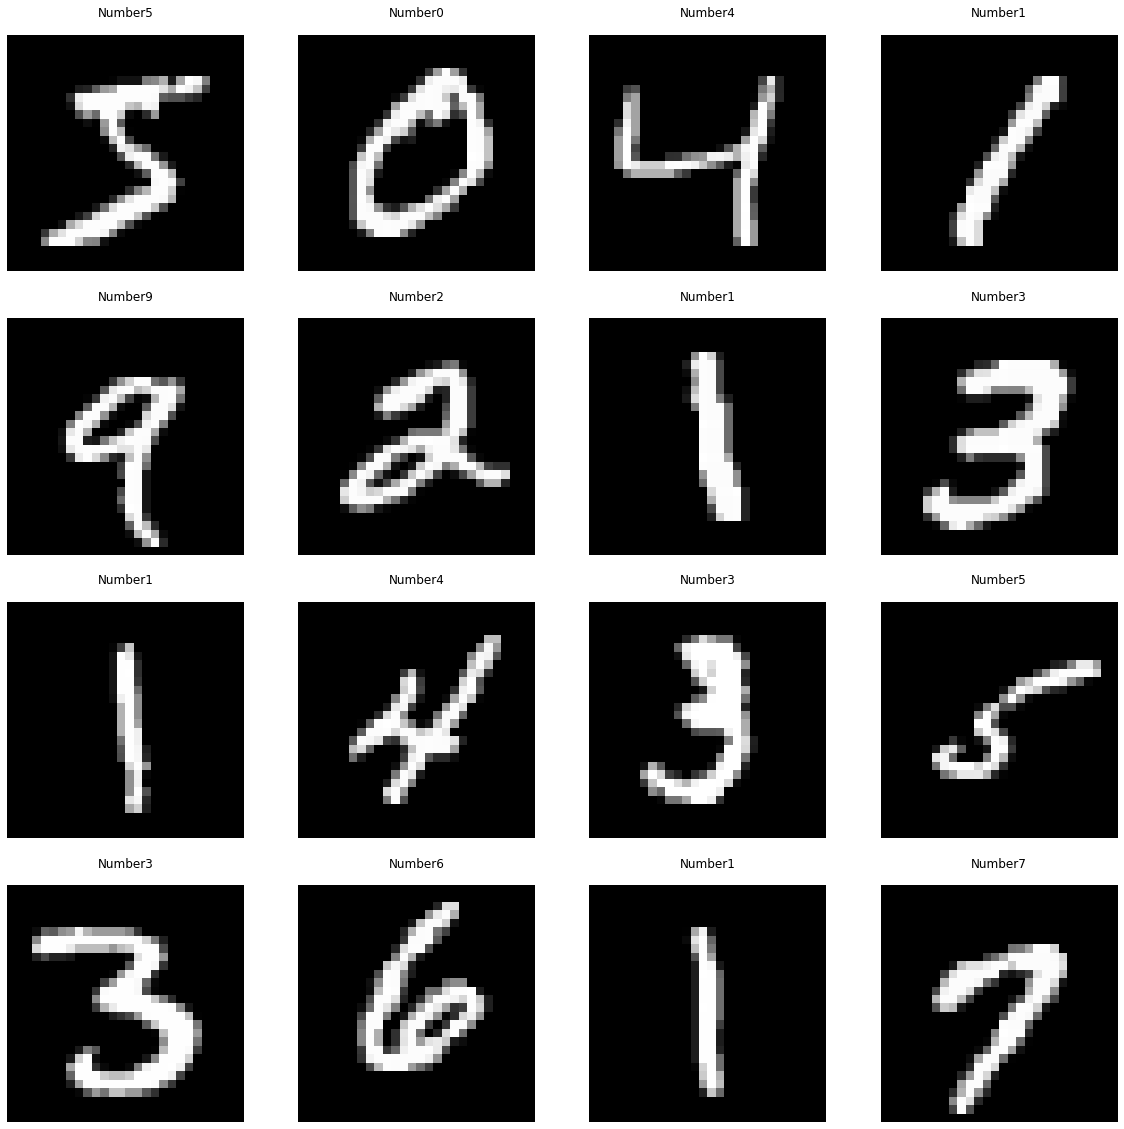

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(4,4,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number{}'.format(y_train[i]))
fig.show()

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1) #pixels and 1 stands for gray scaling
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
print(x_train.shape)
print(x_train.shape[0]) #no of training images
print(x_test.shape[0])  # no of testing images

(60000, 28, 28, 1)
60000
10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
#by def padding is valid
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=3) #epochs is number of iterations ..more number of epoches it will be larning and loss will be reduced

Epoch 1/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2140 - accuracy: 0.9356
Epoch 2/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0929 - accuracy: 0.9716
Epoch 3/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0644 - accuracy: 0.9800


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0544 - accuracy: 0.9824


[0.05439002066850662, 0.9824000000953674]

# Object Detection on CIFAR Dataset

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))

Training Images: (50000, 32, 32, 3)


In [ ]:
print('Testing Images: {}'.format(X_test.shape))

Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


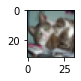

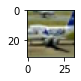

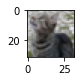

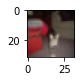

In [ ]:
for i in range(331,335):
  plt.subplot(120+i+1)  #number of rows/columns
  #plt.subplots(figsize=(2,2)) #unclear image
  img = X_train[i]
  plt.imshow(img)
  plt.show()
 

In [ ]:
#initially, reshape the data so as to ensure data is in correct shape
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') #convert each value to float
X_train=X_train/255
X_test=X_test/255 #to reduce the value
nclasses = 10
print("Shape before one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)


In [ ]:
#one hot encoding means only a few legal combinations of bits occur i.e. when there is one high and other low bits
Y_train = np_utils.to_categorical(y_train, nclasses)
Y_test = np_utils.to_categorical(y_test, nclasses)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3))) #all parameters of convulation layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))# one more convulation layer
model.add(MaxPool2D(pool_size=(2,2)))#after conv layer, max pooling layer
model.add(Dropout(0.25))
        

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layers
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10, activation='softmax')) #probsbility distribution

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#there are 3 imp params in compile function loss function , metrics and optimizer

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test)) # here there are 391 samples in each batch.

Epoch 1/5
391/391 [==============================] - 619s 2s/step - loss: 1.2754 - accuracy: 0.5393 - val_loss: 1.0932 - val_accuracy: 0.6125
Epoch 2/5
391/391 [==============================] - 625s 2s/step - loss: 1.0063 - accuracy: 0.6444 - val_loss: 0.8725 - val_accuracy: 0.7015
Epoch 3/5
391/391 [==============================] - 624s 2s/step - loss: 0.8724 - accuracy: 0.6951 - val_loss: 0.7878 - val_accuracy: 0.7292
Epoch 4/5
391/391 [==============================] - 622s 2s/step - loss: 0.7745 - accuracy: 0.7279 - val_loss: 0.7209 - val_accuracy: 0.7488
Epoch 5/5
391/391 [==============================] - 624s 2s/step - loss: 0.7060 - accuracy: 0.7532 - val_loss: 0.7098 - val_accuracy: 0.7539


In [ ]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes, names))# zip name and classes together i.e. if 0 occurs then its an aeroplane
batch = X_test[8:17] #generate a sample of 5 images for prediction
labels = np.argmax(Y_test[8:17],axis=-1)  #largest number i.e. largest probability
predictions = model.predict(batch,verbose=1)

In [ ]:
for image in predictions:
  print(np.sum(image))

In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)


In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()
for i, img in enumerate(batch):  #batch consists of test images hence for i for 6 images
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show()
